In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import mlxtend

In [2]:
df = pd.read_csv("dm_data.csv")
df.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic,no,0,may,mon,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,0,may,mon,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,0,may,mon,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,0,may,mon,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,1,may,mon,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
len(df)

41188

In [4]:
df['education'].value_counts()

basic                  13009
university.degree      12291
high.school             9665
professional.course     5243
unknown                  962
illiterate                18
Name: education, dtype: int64

In [5]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [6]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [7]:
df['job'].value_counts()

admin.           10422
blue-collar       9355
technician        6753
services          3969
management        2924
retired           1741
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            198
Name: job, dtype: int64

## Binning the Data (Quantile Binning)

#### Age

In [8]:
num_quantiles = 4

# Use equal-frequency binning (quantiles)
df['age_group'] = pd.qcut(df['age'], q=num_quantiles)
df.head()

,age,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,56,housemaid,married,basic,no,0,may,mon,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"
1,57,services,married,high.school,no,0,may,mon,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"
2,37,services,married,high.school,yes,0,may,mon,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]"
3,40,admin.,married,basic,no,0,may,mon,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]"
4,56,services,married,high.school,no,1,may,mon,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"


In [9]:
df_sorted = df.sort_values(by='age')

age_counts = df_sorted['age'].value_counts().reset_index().sort_values(by='index')

age_counts.columns = ['Age', 'Count']

pd.set_option('display.max_rows', None)

print(age_counts)

pd.reset_option('display.max_rows')

    Age  Count
70   17      5
57   18     28
49   19     42
41   20     65
39   21    102
38   22    137
37   23    226
35   24    463
32   25    598
28   26    698
22   27    851
18   28   1001
8    29   1453
6    30   1714
0    31   1947
1    32   1846
2    33   1833
5    34   1745
4    35   1759
3    36   1780
7    37   1475
10   38   1407
9    39   1432
12   40   1161
11   41   1278
13   42   1142
15   43   1055
17   44   1011
14   45   1103
16   46   1030
20   47    928
19   48    979
23   49    839
21   50    875
25   51    754
24   52    779
26   53    733
29   54    684
30   55    648
27   56    704
31   57    646
33   58    576
34   59    463
36   60    283
40   61     73
42   62     62
45   63     55
44   64     57
48   65     44
43   66     57
59   67     26
54   68     33
51   69     34
47   70     47
46   71     53
52   72     34
53   73     34
55   74     32
60   75     24
50   76     34
62   77     20
58   78     27
67   79     14
56   80     31
63   81     20
64   82   

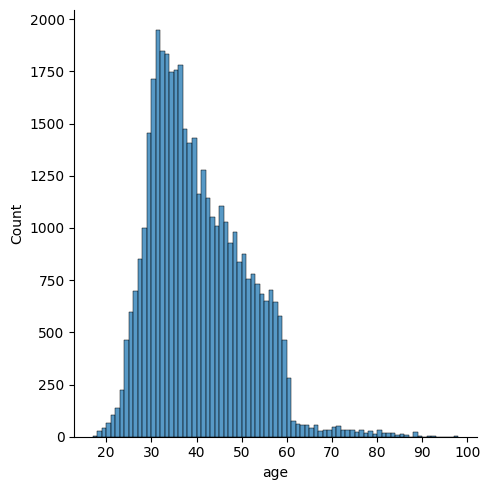

In [10]:
sns.displot(data=df, x=df["age"], bins = range(min(df["age"]),max(df["age"]+1)),kind = 'hist')
plt.show()

In [11]:
df['age_group'].value_counts()

(16.999, 32.0]    11176
(38.0, 47.0]      10140
(32.0, 38.0]       9999
(47.0, 98.0]       9873
Name: age_group, dtype: int64

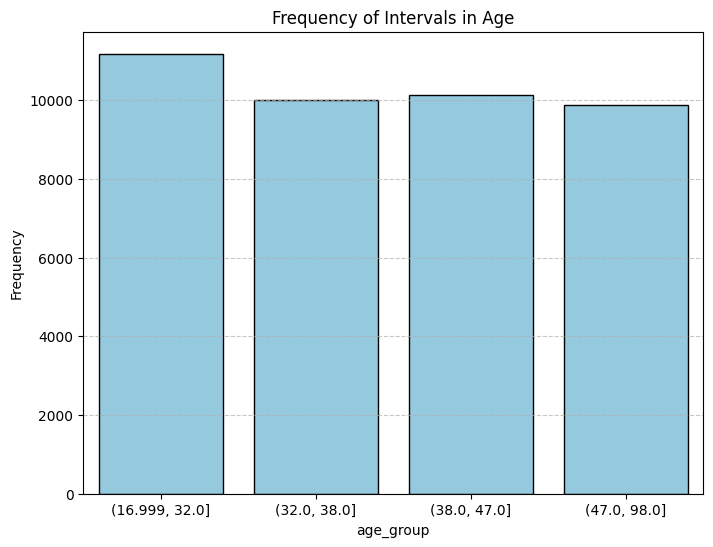

In [24]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in Age')
plt.xlabel('age_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [12]:
df = df.drop('age', axis=1)

In [13]:
df.head()

,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group
0,housemaid,married,basic,no,0,may,mon,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"
1,services,married,high.school,no,0,may,mon,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"
2,services,married,high.school,yes,0,may,mon,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]"
3,admin.,married,basic,no,0,may,mon,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]"
4,services,married,high.school,no,1,may,mon,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]"


#### Duration

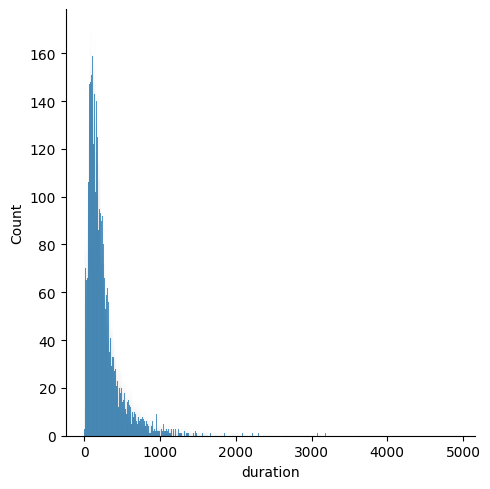

In [14]:
sns.displot(data=df, x=df["duration"], bins = range(min(df["duration"]),max(df["duration"]+1)),kind = 'hist')
plt.show()

In [15]:
num_quantiles = 4

# Use equal-frequency binning (quantiles)
df['duration_group'] = pd.qcut(df['duration'], q=num_quantiles)
df.head()

,job,marital,education,housing,loan,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group
0,housemaid,married,basic,no,0,may,mon,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]"
1,services,married,high.school,no,0,may,mon,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]"
2,services,married,high.school,yes,0,may,mon,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]"
3,admin.,married,basic,no,0,may,mon,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]"
4,services,married,high.school,no,1,may,mon,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]"


In [ ]:
sns.displot(data=df, x=df["duration_group"], bins = range(min(df["duration_group"]),max(df["duration"]+1)),kind = 'hist')
plt.show()

In [16]:
df['duration_group'].value_counts()

(102.0, 180.0]     10392
(-0.001, 102.0]    10313
(319.0, 4918.0]    10286
(180.0, 319.0]     10197
Name: duration_group, dtype: int64

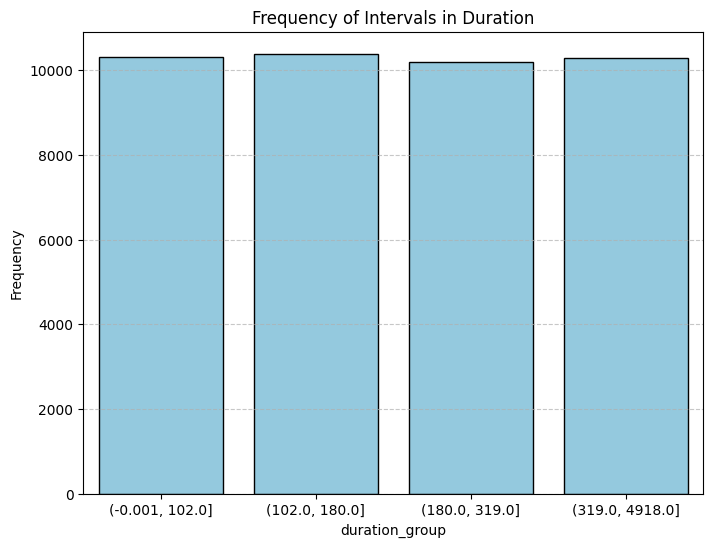

In [25]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='duration_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in Duration')
plt.xlabel('duration_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [17]:
df = df.drop('duration', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group
0,housemaid,married,basic,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]"
1,services,married,high.school,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]"
2,services,married,high.school,yes,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]"
3,admin.,married,basic,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]"
4,services,married,high.school,no,1,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]"


#### Campaign

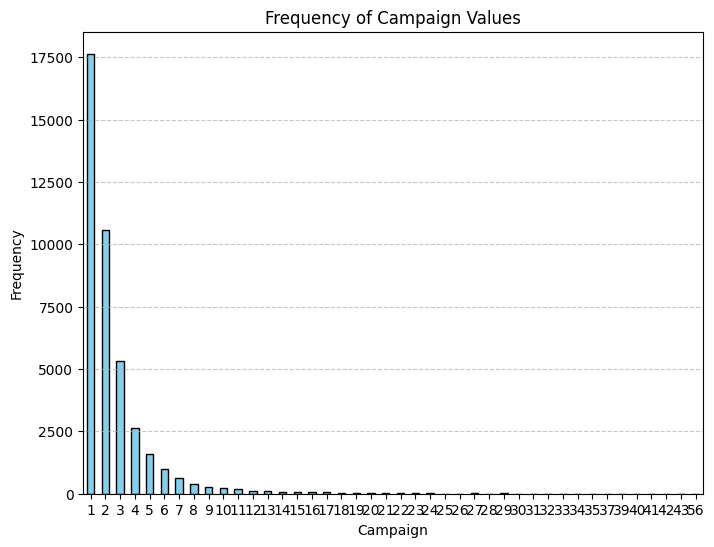

In [18]:
plt.figure(figsize=(8, 6))
df['campaign'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Campaign Values')
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [19]:
num_quantiles = 2

# Use equal-frequency binning (quantiles)
df['campaign_group'] = pd.qcut(df['campaign'], q=num_quantiles)
df.head()

,job,marital,education,housing,loan,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group
0,housemaid,married,basic,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]"
1,services,married,high.school,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]"
2,services,married,high.school,yes,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]"
3,admin.,married,basic,no,0,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]"
4,services,married,high.school,no,1,may,mon,1,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]"


In [20]:
df['campaign_group'].value_counts()

(0.999, 2.0]    28212
(2.0, 56.0]     12976
Name: campaign_group, dtype: int64

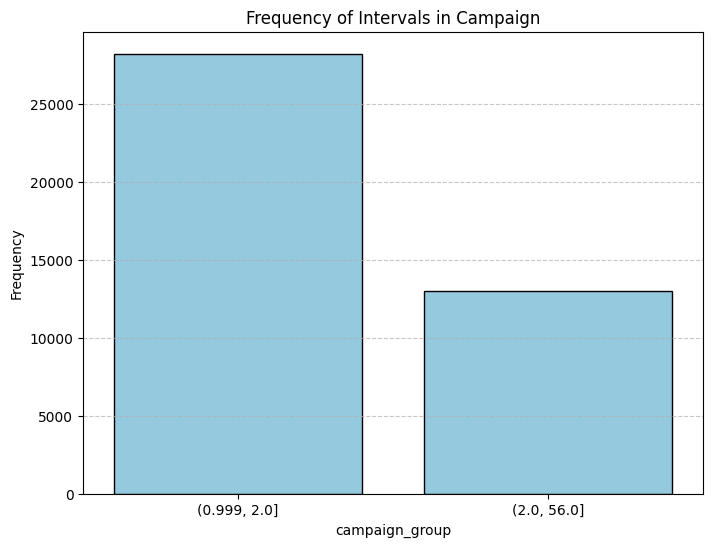

In [26]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='campaign_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in Campaign')
plt.xlabel('campaign_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [21]:
df = df.drop('campaign', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group
0,housemaid,married,basic,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]"
1,services,married,high.school,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]"
2,services,married,high.school,yes,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]"
3,admin.,married,basic,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]"
4,services,married,high.school,no,1,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]"


#### emp.var.rate

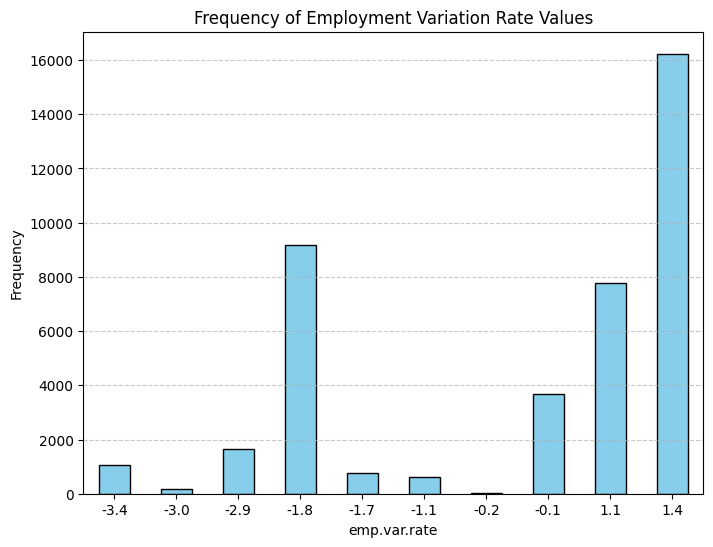

In [27]:
plt.figure(figsize=(8, 6))
df['emp.var.rate'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Employment Variation Rate Values')
plt.xlabel('emp.var.rate')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [23]:
df['empvar_group'] = df['emp.var.rate'].apply(lambda x: 'hired' if x > 0 else 'fired')
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group,empvar_group
0,housemaid,married,basic,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired
1,services,married,high.school,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired
2,services,married,high.school,yes,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired
3,admin.,married,basic,no,0,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired
4,services,married,high.school,no,1,may,mon,0,0,1.1,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired


In [28]:
df['empvar_group'].value_counts()

hired    23997
fired    17191
Name: empvar_group, dtype: int64

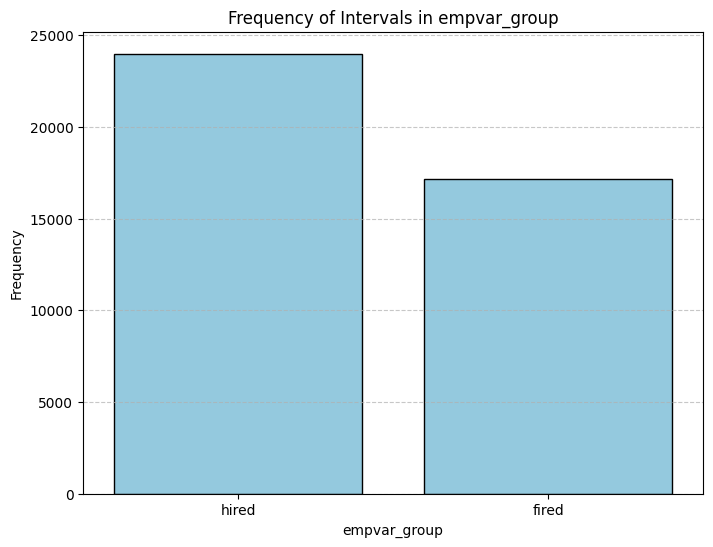

In [29]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='empvar_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in empvar_group')
plt.xlabel('empvar_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [30]:
df = df.drop('emp.var.rate', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group,empvar_group
0,housemaid,married,basic,no,0,may,mon,0,0,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired
1,services,married,high.school,no,0,may,mon,0,0,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired
2,services,married,high.school,yes,0,may,mon,0,0,93.994,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired
3,admin.,married,basic,no,0,may,mon,0,0,93.994,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired
4,services,married,high.school,no,1,may,mon,0,0,93.994,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired


#### Cons.price.idx

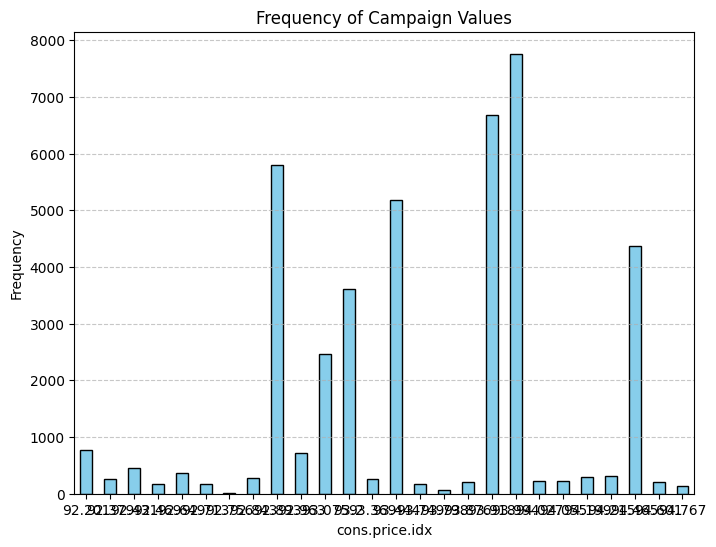

In [31]:
plt.figure(figsize=(8, 6))
df['cons.price.idx'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Campaign Values')
plt.xlabel('cons.price.idx')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [32]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [33]:
df['cons.price.idx'] = np.floor(df['cons.price.idx'])
df['cons.price.idx'].value_counts()

93.0    26414
92.0     8992
94.0     5782
Name: cons.price.idx, dtype: int64

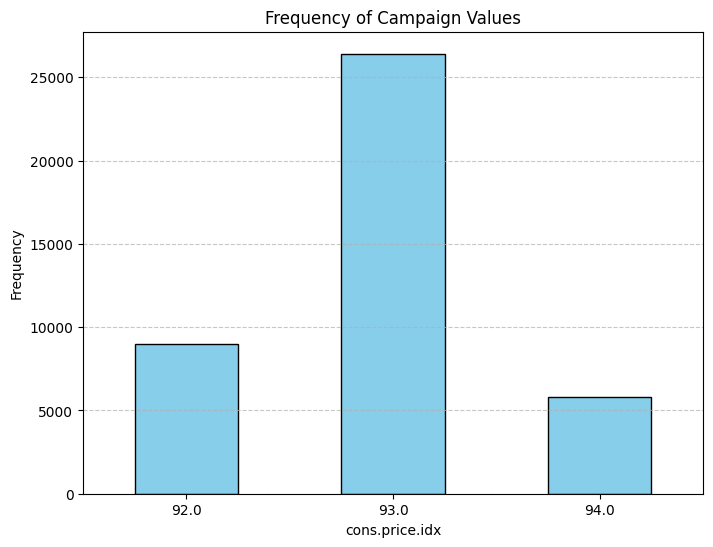

In [34]:
plt.figure(figsize=(8, 6))
df['cons.price.idx'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Campaign Values')
plt.xlabel('cons.price.idx')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Cons.conf.idx

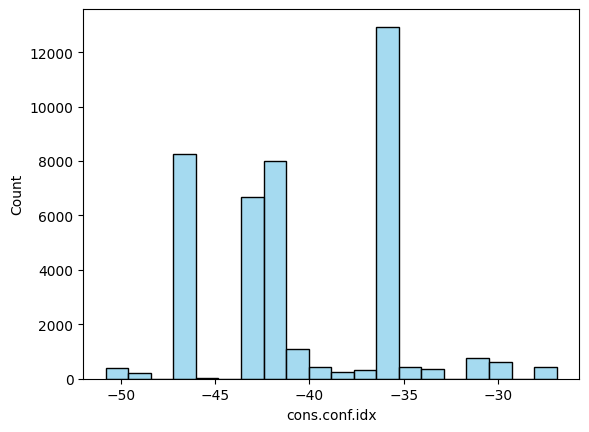

In [35]:
sns.histplot(data=df, x='cons.conf.idx', bins=20, color='skyblue', edgecolor='black')
plt.show()

In [36]:
num_quantiles = 4

# Use equal-frequency binning (quantiles)
df['consconf_group'] = pd.qcut(df['cons.conf.idx'], q=num_quantiles)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group,empvar_group,consconf_group
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,-36.4,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,-36.4,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,-36.4,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"


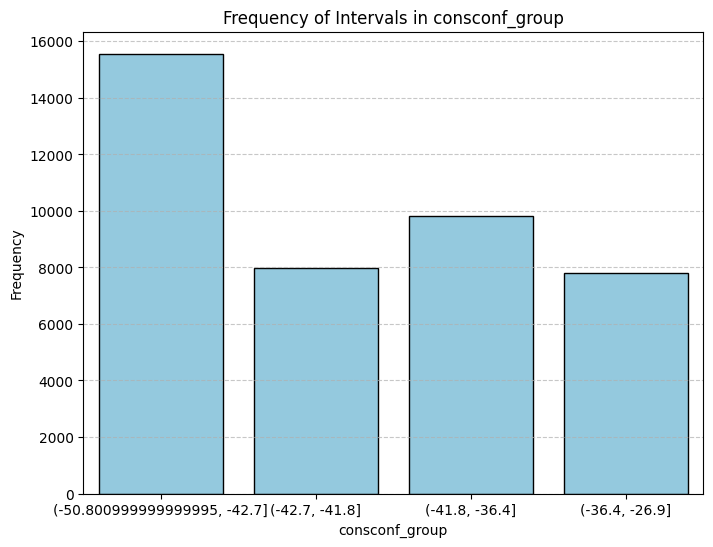

In [37]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='consconf_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in consconf_group')
plt.xlabel('consconf_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [38]:
df['consconf_group'].value_counts()

(-50.800999999999995, -42.7]    15561
(-41.8, -36.4]                   9833
(-42.7, -41.8]                   7990
(-36.4, -26.9]                   7804
Name: consconf_group, dtype: int64

In [39]:
df = df.drop('cons.conf.idx', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group,empvar_group,consconf_group
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]"


#### Euribor3m

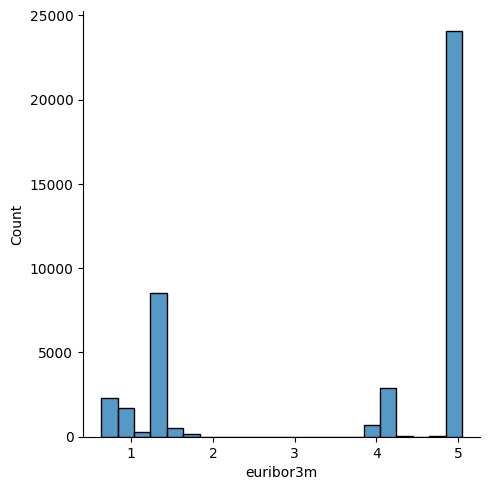

In [40]:
sns.displot(data=df, x=df["euribor3m"], kind = 'hist')
plt.show()

In [41]:
df_sorted = df.sort_values(by='euribor3m')

age_counts = df_sorted['euribor3m'].value_counts().reset_index().sort_values(by='index')

age_counts.columns = ['euribor3m', 'Count']

pd.set_option('display.max_rows', None)

print(age_counts)

pd.reset_option('display.max_rows')

     euribor3m  Count
224      0.634      8
78       0.635     43
172      0.636     14
259      0.637      6
248      0.638      7
163      0.639     16
198      0.640     10
86       0.642     35
118      0.643     23
81       0.644     38
108      0.645     26
73       0.646     49
206      0.649     10
188      0.650     12
236      0.651      7
87       0.652     35
144      0.653     19
139      0.654     20
92       0.655     34
169      0.659     15
194      0.663     11
149      0.668     18
161      0.672     16
186      0.677     12
80       0.682     39
175      0.683     14
164      0.684     16
213      0.685      9
277      0.688      3
281      0.690      3
208      0.692     10
200      0.695     10
119      0.697     23
101      0.699     28
260      0.700      5
191      0.701     11
120      0.702     22
237      0.704      7
148      0.706     18
107      0.707     26
252      0.708      6
229      0.709      8
217      0.710      9
273      0.711      4
207      0

In [42]:
num_quantiles = 3

# Use equal-frequency binning (quantiles)
df['euribor3m_group'] = pd.qcut(df['euribor3m'], q=num_quantiles)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,euribor3m,nr.employed,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,4.857,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,4.857,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,4.857,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"


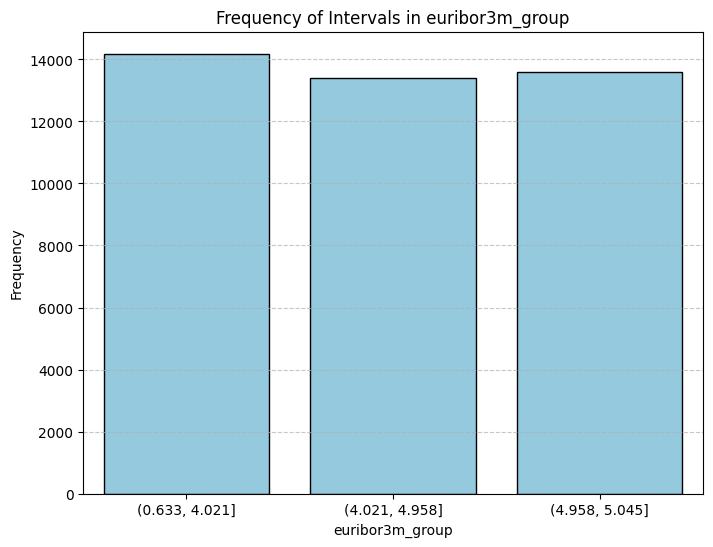

In [43]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='euribor3m_group', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in euribor3m_group')
plt.xlabel('euribor3m_group')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [44]:
df = df.drop('euribor3m', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,nr.employed,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]"


#### Nr.employed

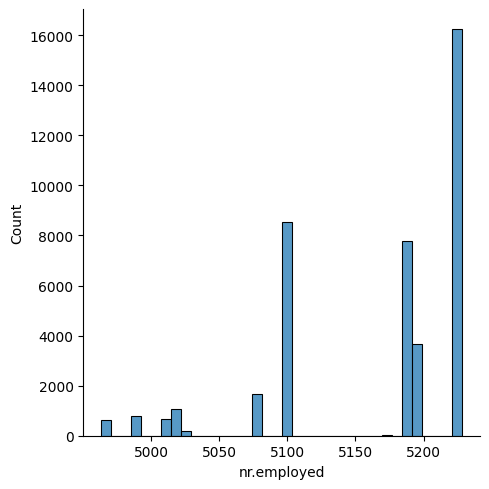

In [45]:
sns.displot(data=df, x=df["nr.employed"], kind = 'hist')
plt.show()

In [46]:
num_quantiles = 2

# Use equal-frequency binning (quantiles)
df['employees_no'] = pd.qcut(df['nr.employed'], q=num_quantiles)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,nr.employed,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group,employees_no
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,5191.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,5191.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,5191.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


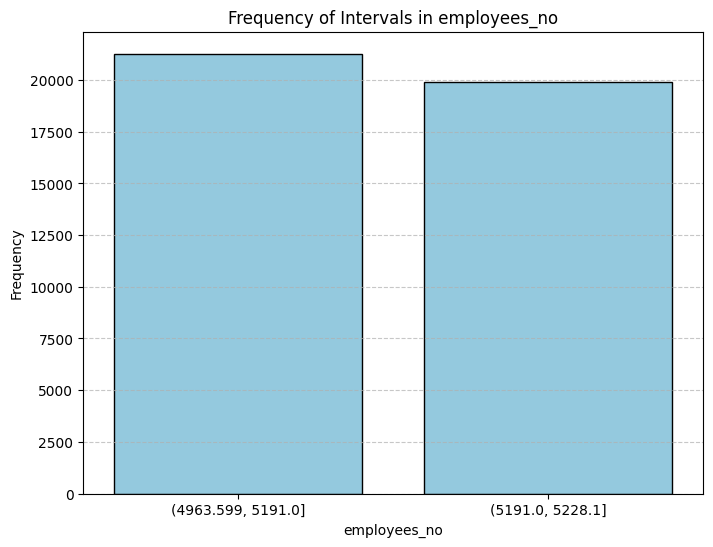

In [74]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='employees_no', color='skyblue', edgecolor='black')

plt.title('Frequency of Intervals in employees_no')
plt.xlabel('employees_no')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [48]:
df = df.drop('nr.employed', axis=1)
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group,employees_no
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"


In [49]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [50]:
df['previous'] = df['previous'].replace({0: '0', 1: '1-7', 2: '1-7', 3: '1-7', 4: '1-7', 5: '1-7', 6: '1-7', 7: '1-7'})
df.head()

,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group,employees_no
0,housemaid,married,basic,no,0,may,mon,0,0,93.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
1,services,married,high.school,no,0,may,mon,0,0,93.0,no,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
2,services,married,high.school,yes,0,may,mon,0,0,93.0,no,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
3,admin.,married,basic,no,0,may,mon,0,0,93.0,no,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
4,services,married,high.school,no,1,may,mon,0,0,93.0,no,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"


## Encoding the Data

In [51]:
df['education'].value_counts()

basic                  13009
university.degree      12291
high.school             9665
professional.course     5243
unknown                  962
illiterate                18
Name: education, dtype: int64

In [52]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
other          80
Name: marital, dtype: int64

In [53]:
df['job'].value_counts()

admin.           10422
blue-collar       9355
technician        6753
services          3969
management        2924
retired           1741
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            198
Name: job, dtype: int64

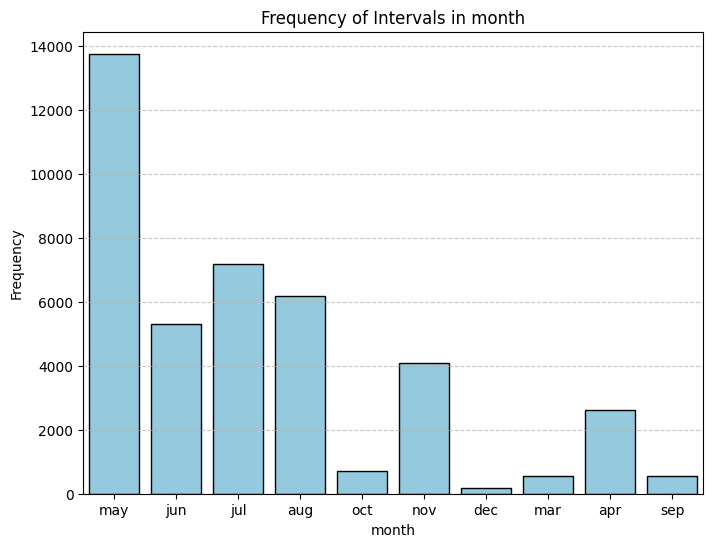

In [54]:
# Plot the frequency of intervals using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='month', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Frequency of Intervals in month')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [61]:
df['cons.price.idx'] = df['cons.price.idx'].astype(str)

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
from mlxtend.frequent_patterns import apriori, association_rules
# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Use Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(df_encoded, min_support=0.4, use_colnames=True)

# Filter out item sets with only one item
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

# Display the filtered frequent item sets
print(frequent_itemsets_filtered)

      support                               itemsets
13   0.513620                         (0_l, married)
14   0.586020                        (0_pd, married)
15   0.529790                        (married, 0_pr)
16   0.543751                        (no_y, married)
17   0.415704                ((0.999, 2.0], married)
..        ...                                    ...
119  0.473487          (0_l, 93.0, no_y, 0_pd, 0_pr)
120  0.403127         (0_l, 93.0, 0_pd, 0_pr, hired)
121  0.444207  (0_l, (0.999, 2.0], no_y, 0_pd, 0_pr)
122  0.471521         (0_l, no_y, 0_pd, 0_pr, hired)
123  0.454137        (93.0, no_y, 0_pd, 0_pr, hired)

[111 rows x 2 columns]


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [63]:
# Iterate through the itemsets
for idx, row in frequent_itemsets_filtered.iterrows():
    itemset = row['itemsets']
    
    # Check if any tuple in the itemset contains the value 0
    columns_with_zero = [col for col in itemset if isinstance(col, tuple) and 0 in col]
    
    if columns_with_zero:
        print(f"Columns associated with '0': {columns_with_zero}")


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical columns to one-hot encoding
df_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Use Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(df_encoded, min_support=0.4, use_colnames=True)

# Filter out item sets with only one item
frequent_itemsets_filtered = frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]
print(frequent_itemsets_filtered)

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                               itemsets
13   0.513620                         (0_l, married)
14   0.586020                        (0_pd, married)
15   0.529790                        (married, 0_pr)
16   0.543751                        (no_y, married)
17   0.415704                ((0.999, 2.0], married)
..        ...                                    ...
119  0.473487          (0_l, 93.0, no_y, 0_pd, 0_pr)
120  0.403127         (0_l, 93.0, 0_pd, 0_pr, hired)
121  0.444207  (0_l, (0.999, 2.0], no_y, 0_pd, 0_pr)
122  0.471521         (0_l, no_y, 0_pd, 0_pr, hired)
123  0.454137        (93.0, no_y, 0_pd, 0_pr, hired)

[111 rows x 2 columns]


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [67]:
# Assuming frequent_itemsets_filtered is a DataFrame with 'itemsets' column
# containing the filtered frequent itemsets

min_confidence = 0.5  # Set your desired confidence threshold

# Create a DataFrame to store the rules
rules_df = pd.DataFrame(columns=['antecedents', 'consequents', 'support', 'confidence'])

# Iterate through each row in frequent_itemsets_filtered
for idx, row in frequent_itemsets_filtered.iterrows():
    itemset = row['itemsets']
    support = row['support']

    # Convert frozenset to list for slicing
    itemset_list = list(itemset)

    # Generate rules for itemsets with more than one item
    if len(itemset_list) > 1:
        for i in range(1, len(itemset_list)):
            antecedents = frozenset(itemset_list[:i])
            consequents = frozenset(itemset_list[i:])
            
            # Query the DataFrame
            query_result = frequent_itemsets_filtered.query('itemsets == @antecedents')['support']
            
            # Check if the query result is not empty
            if not query_result.empty:
                confidence = support / query_result.values[0]

                # Add rule to the DataFrame if confidence is above the threshold
                if confidence >= min_confidence:
                    rules_df = rules_df.append({'antecedents': antecedents,
                                                'consequents': consequents,
                                                'support': support,
                                                'confidence': confidence}, ignore_index=True)

# Display the generated rules
print(rules_df)

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                  antecedents          consequents   support  confidence
0                 (0_l, 0_pd)            (married)  0.497305    0.608400
1              (0_l, married)               (0_pr)  0.449888    0.875916
2                 (no_y, 0_l)            (married)  0.461227    0.613143
3             (0_pd, married)               (0_pr)  0.529790    0.904048
4                (no_y, 0_pd)            (married)  0.536855    0.614137
..                        ...                  ...       ...         ...
104         (0_pd, no_y, 0_l)        (hired, 0_pr)  0.471521    0.636420
105   (0_pd, no_y, 0_l, 0_pr)              (hired)  0.471521    0.706372
106              (no_y, 93.0)  (hired, 0_pd, 0_pr)  0.454137    0.764937
107        (no_y, 0_pd, 93.0)        (hired, 0_pr)  0.454137    0.768457
108  (no_y, 0_pd, 0_pr, 93.0)              (hired)  0.454137    0.812766

[109 rows x 4 columns]


In [68]:
df['housing'] = df['housing'].replace({'no': 'no_h', 'yes': 'yes_h'})
df['y'] = df['y'].replace({'no': 'no_y', 'yes': 'yes_y'})
df['pdays'] = df['pdays'].replace({0: '0_pd', 1: '1_pd'})
df['previous'] = df['previous'].replace({'0': '0_pr'})
df['loan'] = df['loan'].replace({0: '0_l', 1: '1_l'})
df.head()

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,job,marital,education,housing,loan,month,day_of_week,pdays,previous,cons.price.idx,y,age_group,duration_group,campaign_group,empvar_group,consconf_group,euribor3m_group,employees_no
0,housemaid,married,basic,no_h,0_l,may,mon,0_pd,0_pr,93.0,no_y,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
1,services,married,high.school,no_h,0_l,may,mon,0_pd,0_pr,93.0,no_y,"(47.0, 98.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
2,services,married,high.school,yes_h,0_l,may,mon,0_pd,0_pr,93.0,no_y,"(32.0, 38.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
3,admin.,married,basic,no_h,0_l,may,mon,0_pd,0_pr,93.0,no_y,"(38.0, 47.0]","(102.0, 180.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"
4,services,married,high.school,no_h,1_l,may,mon,0_pd,0_pr,93.0,no_y,"(47.0, 98.0]","(180.0, 319.0]","(0.999, 2.0]",hired,"(-41.8, -36.4]","(4.021, 4.958]","(4963.599, 5191.0]"


In [69]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical columns to one-hot encoding
df1_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Use Apriori algorithm to find frequent item sets
frequent_itemsets1 = apriori(df1_encoded, min_support=0.4, use_colnames=True)

# Filter out item sets with only one item
frequent_itemsets_filtered1 = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: len(x) > 1)]
print(frequent_itemsets_filtered1)

      support                               itemsets
13   0.513620                         (0_l, married)
14   0.586020                        (0_pd, married)
15   0.529790                        (married, 0_pr)
16   0.543751                        (no_y, married)
17   0.415704                ((0.999, 2.0], married)
..        ...                                    ...
119  0.473487          (0_l, 93.0, no_y, 0_pd, 0_pr)
120  0.403127         (0_l, 93.0, 0_pd, 0_pr, hired)
121  0.444207  (0_l, (0.999, 2.0], no_y, 0_pd, 0_pr)
122  0.471521         (0_l, no_y, 0_pd, 0_pr, hired)
123  0.454137        (93.0, no_y, 0_pd, 0_pr, hired)

[111 rows x 2 columns]


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [70]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical columns to one-hot encoding
df1_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Use Apriori algorithm to find frequent item sets
frequent_itemsets1 = apriori(df1_encoded, min_support=0.5, use_colnames=True)

# Filter out item sets with only one item
frequent_itemsets_filtered1 = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: len(x) > 1)]
print(frequent_itemsets_filtered1)

     support                          itemsets
10  0.513620                    (0_l, married)
11  0.586020                   (0_pd, married)
12  0.529790                   (married, 0_pr)
13  0.543751                   (no_y, married)
14  0.503909                     (yes_h, 0_pd)
15  0.817398                       (0_pd, 0_l)
16  0.732422                       (0_l, 0_pr)
17  0.543508                       (0_l, 93.0)
18  0.752234                       (no_y, 0_l)
19  0.582961               ((0.999, 2.0], 0_l)
20  0.863431                      (0_pd, 0_pr)
21  0.633655                      (0_pd, 93.0)
22  0.874162                      (no_y, 0_pd)
23  0.655167              ((0.999, 2.0], 0_pd)
24  0.582621                     (0_pd, hired)
25  0.597990                      (93.0, 0_pr)
26  0.787171                      (no_y, 0_pr)
27  0.577377              ((0.999, 2.0], 0_pr)
28  0.582621                     (hired, 0_pr)
29  0.593692                      (no_y, 93.0)
30  0.599714 

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [71]:
# Assuming frequent_itemsets_filtered is a DataFrame with 'itemsets' column
# containing the filtered frequent itemsets

min_confidence = 0.5  # Set your desired confidence threshold

# Create a DataFrame to store the rules
rules_df = pd.DataFrame(columns=['antecedents', 'consequents', 'support', 'confidence'])

# Iterate through each row in frequent_itemsets_filtered
for idx, row in frequent_itemsets_filtered1.iterrows():
    itemset = row['itemsets']
    support = row['support']

    # Convert frozenset to list for slicing
    itemset_list = list(itemset)

    # Generate rules for itemsets with more than one item
    if len(itemset_list) > 1:
        for i in range(1, len(itemset_list)):
            antecedents = frozenset(itemset_list[:i])
            consequents = frozenset(itemset_list[i:])
            
            # Query the DataFrame
            query_result = frequent_itemsets_filtered1.query('itemsets == @antecedents')['support']
            
            # Check if the query result is not empty
            if not query_result.empty:
                confidence = support / query_result.values[0]

                # Add rule to the DataFrame if confidence is above the threshold
                if confidence >= min_confidence:
                    rules_df = rules_df.append({'antecedents': antecedents,
                                                'consequents': consequents,
                                                'support': support,
                                                'confidence': confidence}, ignore_index=True)

# Display the generated rules
print(rules_df)

                   antecedents   consequents   support  confidence
0              (0_pd, married)        (0_pr)  0.529790    0.904048
1                 (no_y, 0_pd)     (married)  0.536855    0.614137
2                  (0_l, 0_pd)        (0_pr)  0.732422    0.896041
3                  (0_l, 0_pd)        (93.0)  0.537098    0.657083
4                 (no_y, 0_pd)         (0_l)  0.740895    0.847549
5         ((0.999, 2.0], 0_pd)         (0_l)  0.557662    0.851177
6                  (0_l, 93.0)        (0_pr)  0.506725    0.932324
7                  (no_y, 0_l)        (0_pr)  0.667525    0.887390
8                  (no_y, 0_l)        (93.0)  0.503181    0.668915
9         ((0.999, 2.0], no_y)         (0_l)  0.510294    0.850897
10                (0_pd, 93.0)        (0_pr)  0.597990    0.943714
11                (no_y, 0_pd)        (0_pr)  0.787171    0.900486
12        ((0.999, 2.0], 0_pd)        (0_pr)  0.577377    0.881267
13               (0_pd, hired)        (0_pr)  0.582621    1.00

/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
from mlxtend.frequent_patterns import apriori, association_rules

# Convert categorical columns to one-hot encoding
df1_encoded = pd.get_dummies(df, prefix='', prefix_sep='')

# Use Apriori algorithm to find frequent item sets
frequent_itemsets1 = apriori(df1_encoded, min_support=0.6, use_colnames=True)

# Filter out item sets with only one item
frequent_itemsets_filtered1 = frequent_itemsets1[frequent_itemsets1['itemsets'].apply(lambda x: len(x) > 1)]
print(frequent_itemsets_filtered1)

     support                 itemsets
7   0.817398              (0_pd, 0_l)
8   0.732422              (0_l, 0_pr)
9   0.752234              (no_y, 0_l)
10  0.863431             (0_pd, 0_pr)
11  0.633655             (0_pd, 93.0)
12  0.874162             (no_y, 0_pd)
13  0.655167     ((0.999, 2.0], 0_pd)
14  0.787171             (no_y, 0_pr)
15  0.732422        (0_pd, 0_l, 0_pr)
16  0.740895        (0_pd, no_y, 0_l)
17  0.667525        (no_y, 0_l, 0_pr)
18  0.787171       (no_y, 0_pd, 0_pr)
19  0.667525  (0_pd, no_y, 0_l, 0_pr)


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [73]:
min_confidence = 0.5  # Set your desired confidence threshold

# Create a DataFrame to store the rules
rules_df = pd.DataFrame(columns=['antecedents', 'consequents', 'support', 'confidence'])

# Iterate through each row in frequent_itemsets_filtered
for idx, row in frequent_itemsets_filtered1.iterrows():
    itemset = row['itemsets']
    support = row['support']

    # Convert frozenset to list for slicing
    itemset_list = list(itemset)

    # Generate rules for itemsets with more than one item
    if len(itemset_list) > 1:
        for i in range(1, len(itemset_list)):
            antecedents = frozenset(itemset_list[:i])
            consequents = frozenset(itemset_list[i:])
            
            # Query the DataFrame
            query_result = frequent_itemsets_filtered1.query('itemsets == @antecedents')['support']
            
            # Check if the query result is not empty
            if not query_result.empty:
                confidence = support / query_result.values[0]

                # Add rule to the DataFrame if confidence is above the threshold
                if confidence >= min_confidence:
                    rules_df = rules_df.append({'antecedents': antecedents,
                                                'consequents': consequents,
                                                'support': support,
                                                'confidence': confidence}, ignore_index=True)

# Display the generated rules
print(rules_df)

         antecedents  consequents   support  confidence
0        (0_l, 0_pd)       (0_pr)  0.732422    0.896041
1       (no_y, 0_pd)        (0_l)  0.740895    0.847549
2        (no_y, 0_l)       (0_pr)  0.667525    0.887390
3       (no_y, 0_pd)       (0_pr)  0.787171    0.900486
4       (no_y, 0_pd)  (0_l, 0_pr)  0.667525    0.763616
5  (0_l, no_y, 0_pd)       (0_pr)  0.667525    0.900970


/Users/hanaissa/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
